In [1]:
install.packages("RMySQL")

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  internet routines cannot be loaded”Warning message:
“package ‘RMySQL’ is not available (for R version 3.4.1)”

In [2]:
# Load the DBI package
library(DBI)

# Edit dbConnect() call
con <- dbConnect(RMySQL::MySQL(), 
                 dbname = "tweater", 
                 host = "courses.csrrinzqubik.us-east-1.rds.amazonaws.com", 
                 port = 3306,
                 user = "student",
                 password = "datacamp")

ERROR: Error in loadNamespace(name): there is no package called ‘RMySQL’


List the database tables
After you've successfully connected to a remote MySQL database, the next step is to see what tables the database contains. You can do this with the dbListTables() function. As you might remember from the video, this function requires the connection object as an input, and outputs a character vector with the table names.

In [3]:
# Build a vector of table names: tables
tables <- dbListTables(con)

# Display structure of tables
str(tables)


ERROR: Error in dbListTables(con): object 'con' not found


mport users
As you might have guessed by now, the database contains data on a more tasty version of Twitter, namely Tweater. Users can post tweats with short recipes for delicious snacks. People can comment on these tweats. There are three tables: users, tweats, and comments that have relations among them. Which ones, you ask? You'll discover in a moment!

Let's start by importing the data on the users into your R session. You do this with the dbReadTable() function. Simply pass it the connection object (con), followed by the name of the table you want to import. The resulting object is a standard R data frame.

In [4]:
# Import the users table from tweater: users
users <- dbReadTable(con, "users")

# Print users
users

ERROR: Error in dbReadTable(con, "users"): object 'con' not found


Import all tables
Next to the users, we're also interested in the tweats and comments tables. However, separate dbReadTable() calls for each and every one of the tables in your database would mean a lot of code duplication. Remember about the lapply() function? You can use it again here! A connection is already coded for you, as well as a vector table_names, containing the names of all the tables in the database.

In [5]:
# Get table names
table_names <- dbListTables(con)

# Import all tables
tables <- lapply( table_names,dbReadTable, conn = con)

# Print out tables
tables

ERROR: Error in dbListTables(con): object 'con' not found


Query tweater (1)
In your life as a data scientist, you'll often be working with huge databases that contain tables with millions of rows. If you want to do some analyses on this data, it's possible that you only need a fraction of this data. In this case, it's a good idea to send SQL queries to your database, and only import the data you actually need into R.

dbGetQuery() is what you need. As usual, you first pass the connection object to it. The second argument is an SQL query in the form of a character string. This example selects the age variable from the people dataset where gender equals "male":

dbGetQuery(con, "SELECT age FROM people WHERE gender = 'male'")
A connection to the tweater database has already been coded for you.

In [6]:
# Import tweat_id column of comments where user_id is 1: elisabeth
elisabeth <- dbGetQuery(con, "SELECT tweat_id FROM comments WHERE user_id=1")

# Print elisabeth
elisabeth

ERROR: Error in dbGetQuery(con, "SELECT tweat_id FROM comments WHERE user_id=1"): object 'con' not found


Apart from checking equality, you can also check for less than and greater than relationships, with < and >, just like in R.

con, a connection to the tweater database, is again available.

In [7]:

# Import post column of tweats where date is higher than '2015-09-21': latest
latest <- dbGetQuery(con, "SELECT post FROM tweats WHERE date>\"2015-09-21\"")

# Print latest
latest

ERROR: Error in dbGetQuery(con, "SELECT post FROM tweats WHERE date>\"2015-09-21\""): object 'con' not found


Suppose that you have a people table, with a bunch of information. This time, you want to find out the age and country of married males. Provided that there is a married column that's 1 when the person in question is married, the following query would work.

SELECT age, country
  FROM people
    WHERE gender = "male" AND married = 1
Can you use a similar approach for a more specialized query on the tweater database?

In [8]:

# Create data frame specific
specific <- dbGetQuery(con, "SELECT message FROM comments WHERE tweat_id=77 AND user_id>4")

# Print specific
specific


ERROR: Error in dbGetQuery(con, "SELECT message FROM comments WHERE tweat_id=77 AND user_id>4"): object 'con' not found


There are also dedicated SQL functions that you can use in the WHERE clause of an SQL query. For example, CHAR_LENGTH() returns the number of characters in a string.

In [10]:
# Create data frame short
short <- dbGetQuery(con, "SELECT id, name FROM users WHERE CHAR_LENGTH(name)<5")

# Print short
short

ERROR: Error in dbGetQuery(con, "SELECT id, name FROM users WHERE CHAR_LENGTH(name)<5"): object 'con' not found


Send - Fetch - Clear
You've used dbGetQuery() multiple times now. This is a virtual function from the DBI package, but is actually implemented by the RMySQL package. Behind the scenes, the following steps are performed:

Sending the specified query with dbSendQuery();
Fetching the result of executing the query on the database with dbFetch();
Clearing the result with dbClearResult().
Let's not use dbGetQuery() this time and implement the steps above. This is tedious to write, but it gives you the ability to fetch the query's result in chunks rather than all at once. You can do this by specifying the n argument inside dbFetch().

In [11]:
# Send query to the database
res <- dbSendQuery(con, "SELECT * FROM comments WHERE user_id > 4")

# Use dbFetch() twice
dbFetch(res, n=2)
dbFetch(res)


# Clear res
dbClearResult(res)

ERROR: Error in dbSendQuery(con, "SELECT * FROM comments WHERE user_id > 4"): object 'con' not found


Be polite and ...
Every time you connect to a database using dbConnect(), you're creating a new connection to the database you're referencing. RMySQL automatically specifies a maximum of open connections and closes some of the connections for you, but still: it's always polite to manually disconnect from the database afterwards. You do this with the dbDisconnect() function.

The code that connects you to the database is already available, can you finish the script?

In [12]:
# Create the data frame  long_tweats
long_tweats <- dbGetQuery(con, "SELECT post, date FROM tweats WHERE CHAR_LENGTH(post)>40")

# Print long_tweats
print(long_tweats)

# Disconnect from the database
dbDisconnect(con)

ERROR: Error in dbGetQuery(con, "SELECT post, date FROM tweats WHERE CHAR_LENGTH(post)>40"): object 'con' not found


Import flat files from the web
In the video, you saw that the utils functions to import flat file data, such as read.csv() and read.delim(), are capable of automatically importing from URLs that point to flat files on the web.

You must be wondering whether Hadley Wickham's alternative package, readr, is equally potent. Well, figure it out in this exercise! The URLs for both a .csv file as well as a .delim file are already coded for you. It's up to you to actually import the data. If it works, that is...

In [13]:
# Load the readr package
library(readr)

# Import the csv file: pools
url_csv <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/swimming_pools.csv"
pools <- read_csv(url_csv)

# Import the txt file: potatoes
url_delim <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/potatoes.txt"
potatoes <- read_tsv(url_delim)

# Print pools and potatoes
pools
potatoes

Parsed with column specification:
cols(
  Name = col_character(),
  Address = col_character(),
  Latitude = col_double(),
  Longitude = col_double()
)
Parsed with column specification:
cols(
  area = col_integer(),
  temp = col_integer(),
  size = col_integer(),
  storage = col_integer(),
  method = col_integer(),
  texture = col_double(),
  flavor = col_double(),
  moistness = col_double()
)


Name,Address,Latitude,Longitude
Acacia Ridge Leisure Centre,"1391 Beaudesert Road, Acacia Ridge",-27.58616,153.0264
Bellbowrie Pool,"Sugarwood Street, Bellbowrie",-27.56547,152.8911
Carole Park,Cnr Boundary Road and Waterford Road Wacol,-27.60744,152.9315
Centenary Pool (inner City),"400 Gregory Terrace, Spring Hill",-27.45537,153.0251
Chermside Pool,"375 Hamilton Road, Chermside",-27.38583,153.0351
Colmslie Pool (Morningside),"400 Lytton Road, Morningside",-27.45516,153.0789
Spring Hill Baths (inner City),"14 Torrington Street, Springhill",-27.45960,153.0215
Dunlop Park Pool (Corinda),"794 Oxley Road, Corinda",-27.54652,152.9806
Fortitude Valley Pool,"432 Wickham Street, Fortitude Valley",-27.45390,153.0368
Hibiscus Sports Complex (upper MtGravatt),"90 Klumpp Road, Upper Mount Gravatt",-27.55183,153.0735


area,temp,size,storage,method,texture,flavor,moistness
1,1,1,1,1,2.9,3.2,3.0
1,1,1,1,2,2.3,2.5,2.6
1,1,1,1,3,2.5,2.8,2.8
1,1,1,1,4,2.1,2.9,2.4
1,1,1,1,5,1.9,2.8,2.2
1,1,1,2,1,1.8,3.0,1.7
1,1,1,2,2,2.6,3.1,2.4
1,1,1,2,3,3.0,3.0,2.9
1,1,1,2,4,2.2,3.2,2.5
1,1,1,2,5,2.0,2.8,1.9


Secure importing
In the previous exercises, you have been working with URLs that all start with http://. There is, however, a safer alternative to HTTP, namely HTTPS, which stands for HypterText Transfer Protocol Secure. Just remember this: HTTPS is relatively safe, HTTP is not.

Luckily for us, you can use the standard importing functions with https:// connections since R version 3.2.2.

In [16]:
# https URL to the swimming_pools csv file.
url_csv <- "https://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/swimming_pools.csv"

# Import the file using read.csv(): pools1
pools1 <- read.csv(url_csv, header=TRUE)

# Load the readr package
library(readr)

# Import the file using read_csv(): pools2
pools2 <- read_csv(url_csv)

# Print the structure of pools1 and pools2
str(pools1)
str(pools2)


ERROR: Error in file(file, "rt"): internet routines cannot be loaded


Import Excel files from the web
When you learned about gdata, it was already mentioned that gdata can handle .xls files that are on the internet. readxl can't, at least not yet. The URL with which you'll be working is already available in the sample code. You will import it once using gdata and once with the readxl package via a workaround.

In [17]:
# Load the readxl and gdata package
library(readxl)
library(gdata)

# Specification of url: url_xls
url_xls <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/latitude.xls"

# Import the .xls file with gdata: excel_gdata
excel_gdata <- read.xls(url_xls)

# Download file behind URL, name it local_latitude.xls
dest_path <- file.path("~", "local_latitude.xls")
download.file(url_xls, dest_path)

# Import the local .xls file with readxl: excel_readxl
excel_readxl <- read_excel(dest_path)

ERROR: Error in library(gdata): there is no package called ‘gdata’


Downloading any file, secure or not
In the previous exercise you've seen how you can read excel files on the web using the read_excel package by first downloading the file with the download.file() function.

There's more: with download.file() you can download any kind of file from the web, using HTTP and HTTPS: images, executable files, but also .RData files. An RData file is very efficient format to store R data.

You can load data from an RData file using the load() function, but this function does not accept a URL string as an argument. In this exercise, you'll first download the RData file securely, and then import the local data file.

In [19]:
# https URL to the wine RData file.
url_rdata <- "https://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/wine.RData"

# Download the wine file to your working directory
dest_path <- file.path("~", "wine_local.RData")
download.file(url_rdata, dest_path)

# Load the wine data into your workspace using load()
load("wine_local.RData")

# Print out the summary of the wine data
summary(wine)

ERROR: Error in download.file(url_rdata, dest_path): internet routines cannot be loaded


HTTP? httr! (1)
Downloading a file from the Internet means sending a GET request and receiving the file you asked for. Internally, all the previously discussed functions use a GET request to download files.

httr provides a convenient function, GET() to execute this GET request. The result is a response object, that provides easy access to the status code, content-type and, of course, the actual content.

You can extract the content from the request using the content() function. At the time of writing, there are three ways to retrieve this content: as a raw object, as a character vector, or an R object, such as a list. If you don't tell content() how to retrieve the content through the as argument, it'll try its best to figure out which type is most appropriate based on the content-type.

In [20]:
# Load the httr package
library(httr)

# Get the url, save response to resp
url <- "http://www.example.com/"
resp <- GET(url)

# Print resp
resp

# Get the raw content of resp: raw_content
raw_content <- content(resp, as="raw")

# Print the head of raw_content
head(raw_content)

Response [http://www.example.com/]
  Date: 2017-12-19 11:04
  Status: 200
  Content-Type: text/html
  Size: 1.27 kB
<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
...

[1] 3c 21 64 6f 63 74

HTTP? httr! (2)
Web content does not limit itself to HTML pages and files stored on remote servers such as DataCamp's Amazon S3 instances. There are many other data formats out there. A very common one is JSON. This format is very often used by so-called Web APIs, interfaces to web servers with which you as a client can communicate to get or store information in more complicated ways.

You'll learn about Web APIs and JSON in the video and exercises that follow, but some experimentation never hurts, does it?

In [21]:
# httr is already loaded

# Get the url
url <- "http://www.omdbapi.com/?apikey=ff21610b&t=Annie+Hall&y=&plot=short&r=json"
resp <- GET(url)

# Print resp
resp

# Print content of resp as text
content(resp, as="text")

# Print content of resp
content(resp)

Response [http://www.omdbapi.com/?apikey=ff21610b&t=Annie+Hall&y=&plot=short&r=json]
  Date: 2017-12-19 11:05
  Status: 200
  Content-Type: application/json; charset=utf-8
  Size: 942 B


[1] "{\"Title\":\"Annie Hall\",\"Year\":\"1977\",\"Rated\":\"PG\",\"Released\":\"20 Apr 1977\",\"Runtime\":\"93 min\",\"Genre\":\"Comedy, Romance\",\"Director\":\"Woody Allen\",\"Writer\":\"Woody Allen, Marshall Brickman\",\"Actors\":\"Woody Allen, Diane Keaton, Tony Roberts, Carol Kane\",\"Plot\":\"Neurotic New York comedian Alvy Singer falls in love with the ditzy Annie Hall.\",\"Language\":\"English, German\",\"Country\":\"USA\",\"Awards\":\"Won 4 Oscars. Another 26 wins & 8 nominations.\",\"Poster\":\"https://images-na.ssl-images-amazon.com/images/M/MV5BZDg1OGQ4YzgtM2Y2NS00NjA3LWFjYTctMDRlMDI3NWE1OTUyXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_SX300.jpg\",\"Ratings\":[{\"Source\":\"Internet Movie Database\",\"Value\":\"8.1/10\"},{\"Source\":\"Rotten Tomatoes\",\"Value\":\"97%\"},{\"Source\":\"Metacritic\",\"Value\":\"92/100\"}],\"Metascore\":\"92\",\"imdbRating\":\"8.1\",\"imdbVotes\":\"214,867\",\"imdbID\":\"tt0075686\",\"Type\":\"movie\",\"DVD\":\"28 Apr 1998\",\"BoxOffice\":\"N/A\",\"Production\":\"United Artists\",\"Website\":\"N/A\",\"Response\":\"True\"}"

$Title
[1] "Annie Hall"

$Year
[1] "1977"

$Rated
[1] "PG"

$Released
[1] "20 Apr 1977"

$Runtime
[1] "93 min"

$Genre
[1] "Comedy, Romance"

$Director
[1] "Woody Allen"

$Writer
[1] "Woody Allen, Marshall Brickman"

$Actors
[1] "Woody Allen, Diane Keaton, Tony Roberts, Carol Kane"

$Plot
[1] "Neurotic New York comedian Alvy Singer falls in love with the ditzy Annie Hall."

$Language
[1] "English, German"

$Country
[1] "USA"

$Awards
[1] "Won 4 Oscars. Another 26 wins & 8 nominations."

$Poster
[1] "https://images-na.ssl-images-amazon.com/images/M/MV5BZDg1OGQ4YzgtM2Y2NS00NjA3LWFjYTctMDRlMDI3NWE1OTUyXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_SX300.jpg"

$Ratings
$Ratings[[1]]
$Ratings[[1]]$Source
[1] "Internet Movie Database"

$Ratings[[1]]$Value
[1] "8.1/10"


$Ratings[[2]]
$Ratings[[2]]$Source
[1] "Rotten Tomatoes"

$Ratings[[2]]$Value
[1] "97%"


$Ratings[[3]]
$Ratings[[3]]$Source
[1] "Metacritic"

$Ratings[[3]]$Value
[1] "92/100"



$Metascore
[1] "92"

$imdbRating
[1] "8.1"

$imdbVotes
[1] "214,867"

$imdbID
[1] "tt0075686"

$Type
[1] "movie"

$DVD
[1] "28 Apr 1998"

$BoxOffice
[1] "N/A"

$Production
[1] "United Artists"

$Website
[1] "N/A"

$Response
[1] "True"

From JSON to R
In the simplest setting, fromJSON() can convert character strings that represent JSON data into a nicely structured R list. Give it a try!

In [22]:
# Load the jsonlite package
library(jsonlite)

# wine_json is a JSON
wine_json <- '{"name":"Chateau Migraine", "year":1997, "alcohol_pct":12.4, "color":"red", "awarded":false}'

# Convert wine_json into a list: wine
wine <- fromJSON(wine_json)

# Print structure of wine
str(wine)

List of 5
 $ name       : chr "Chateau Migraine"
 $ year       : int 1997
 $ alcohol_pct: num 12.4
 $ color      : chr "red"
 $ awarded    : logi FALSE


Quandl API
As Filip showed in the video, fromJSON() also works if you pass a URL as a character string or the path to a local file that contains JSON data. Let's try this out on the Quandl API, where you can fetch all sorts of financial and economical data.

In [23]:
# jsonlite is preloaded

# Definition of quandl_url
quandl_url <- "https://www.quandl.com/api/v3/datasets/WIKI/FB/data.json?auth_token=i83asDsiWUUyfoypkgMz"

# Import Quandl data: quandl_data
quandl_data <- fromJSON(quandl_url)

# Print structure of quandl_data
str(quandl_data)

List of 1
 $ dataset_data:List of 10
  ..$ limit       : NULL
  ..$ transform   : NULL
  ..$ column_index: NULL
  ..$ column_names: chr [1:13] "Date" "Open" "High" "Low" ...
  ..$ start_date  : chr "2012-05-18"
  ..$ end_date    : chr "2017-12-18"
  ..$ frequency   : chr "daily"
  ..$ data        : chr [1:1405, 1:13] "2017-12-18" "2017-12-15" "2017-12-14" "2017-12-13" ...
  ..$ collapse    : NULL
  ..$ order       : NULL


OMDb API
In the video, you saw how easy it is to interact with an API once you know how to formulate requests. You also saw how to fetch all information on Rain Man from OMDb. Simply perform a GET() call, and next ask for the contents with the content() function. This content() function, which is part of the httr package, uses jsonlite behind the scenes to import the JSON data into R.

However, by now you also know that jsonlite can handle URLs itself. Simply passing the request URL to fromJSON() will get your data into R. In this exercise, you will be using this technique to compare the release year of two movies in the Open Movie Database.

In [24]:
# The package jsonlite is already loaded

# Definition of the URLs
url_sw4 <- "http://www.omdbapi.com/?apikey=ff21610b&i=tt0076759&r=json"
url_sw3 <- "http://www.omdbapi.com/?apikey=ff21610b&i=tt0121766&r=json"

# Import two URLs with fromJSON(): sw4 and sw3
sw4 <- fromJSON(url_sw4)
sw3 <- fromJSON(url_sw3)

# Print out the Title element of both lists
sw4$Title
sw3$Title

# Is the release year of sw4 later than sw3?
sw4$Year > sw3$Year

[1] "Star Wars: Episode IV - A New Hope"

[1] "Star Wars: Episode III - Revenge of the Sith"

[1] FALSE

JSON practice (1)
JSON is built on two structures: objects and arrays. To help you experiment with these, two JSON strings are included in the sample code. It's up to you to change them appropriately and then call jsonlite's fromJSON() function on them each time.

In [25]:
# jsonlite is already loaded

# Challenge 1
json1 <- '[1, 2,3, 4, 5,6]'
fromJSON(json1)

# Challenge 2
json2 <- '{"a": [1, 2, 3], "b":[4,5,6]}'
fromJSON(json2)

[1] 1 2 3 4 5 6

$a
[1] 1 2 3

$b
[1] 4 5 6

JSON practice (2)
We prepared two more JSON strings in the sample code. Can you change them and call jsonlite's fromJSON() function on them, similar to the previous exercise?

In [26]:
# jsonlite is already loaded

# Challenge 1
json1 <- '[[1, 2], [3, 4]]'
fromJSON(json1)

# Challenge 2
json2 <- '[{"a": 1, "b": 2}, {"a": 3, "b": 4}, {"a": 5, "b": 6}]'
fromJSON(json2)

1,2
3,4


a,b
1,2
3,4
5,6


toJSON()
Apart from converting JSON to R with fromJSON(), you can also use toJSON() to convert R data to a JSON format. In its most basic use, you simply pass this function an R object to convert to a JSON. The result is an R object of the class json, which is basically a character string representing that JSON.

For this exercise, you will be working with a .csv file containing information on the amount of desalinated water that is produced around the world. As you'll see, it contains a lot of missing values. This data can be found on the URL that is specified in the sample code.

In [27]:
# jsonlite is already loaded

# URL pointing to the .csv file
url_csv <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/water.csv"

# Import the .csv file located at url_csv
water <- read.csv(url_csv, stringsAsFactors=FALSE)

# Convert the data file according to the requirements
water_json <- toJSON(water)

# Print out water_json
water_json

ERROR: Error in file(file, "rt"): internet routines cannot be loaded


Minify and prettify
JSONs can come in different formats. Take these two JSONs, that are in fact exactly the same: the first one is in a minified format, the second one is in a pretty format with indentation, whitespace and new lines:

# Mini
{"a":1,"b":2,"c":{"x":5,"y":6}}

# Pretty
{
  "a": 1,
  "b": 2,
  "c": {
    "x": 5,
    "y": 6
  }
}
Unless you're a computer, you surely prefer the second version. However, the standard form that toJSON() returns, is the minified version, as it is more concise. You can adapt this behavior by setting the pretty argument inside toJSON() to TRUE. If you already have a JSON string, you can use prettify() or minify() to make the JSON pretty or as concise as possible.

In [28]:
# jsonlite is already loaded

# Convert mtcars to a pretty JSON: pretty_json
pretty_json <- toJSON(mtcars, pretty=TRUE)

# Print pretty_json
pretty_json

# Minify pretty_json: mini_json
mini_json <- minify(pretty_json)

# Print mini_json
mini_json

[
  {
    "mpg": 21,
    "cyl": 6,
    "disp": 160,
    "hp": 110,
    "drat": 3.9,
    "wt": 2.62,
    "qsec": 16.46,
    "vs": 0,
    "am": 1,
    "gear": 4,
    "carb": 4,
    "_row": "Mazda RX4"
  },
  {
    "mpg": 21,
    "cyl": 6,
    "disp": 160,
    "hp": 110,
    "drat": 3.9,
    "wt": 2.875,
    "qsec": 17.02,
    "vs": 0,
    "am": 1,
    "gear": 4,
    "carb": 4,
    "_row": "Mazda RX4 Wag"
  },
  {
    "mpg": 22.8,
    "cyl": 4,
    "disp": 108,
    "hp": 93,
    "drat": 3.85,
    "wt": 2.32,
    "qsec": 18.61,
    "vs": 1,
    "am": 1,
    "gear": 4,
    "carb": 1,
    "_row": "Datsun 710"
  },
  {
    "mpg": 21.4,
    "cyl": 6,
    "disp": 258,
    "hp": 110,
    "drat": 3.08,
    "wt": 3.215,
    "qsec": 19.44,
    "vs": 1,
    "am": 0,
    "gear": 3,
    "carb": 1,
    "_row": "Hornet 4 Drive"
  },
  {
    "mpg": 18.7,
    "cyl": 8,
    "disp": 360,
    "hp": 175,
    "drat": 3.15,
    "wt": 3.44,
    "qsec": 17.02,
    "vs": 0,
    "am": 0,
    "gear": 3,
    "carb": 

[{"mpg":21,"cyl":6,"disp":160,"hp":110,"drat":3.9,"wt":2.62,"qsec":16.46,"vs":0,"am":1,"gear":4,"carb":4,"_row":"Mazda RX4"},{"mpg":21,"cyl":6,"disp":160,"hp":110,"drat":3.9,"wt":2.875,"qsec":17.02,"vs":0,"am":1,"gear":4,"carb":4,"_row":"Mazda RX4 Wag"},{"mpg":22.8,"cyl":4,"disp":108,"hp":93,"drat":3.85,"wt":2.32,"qsec":18.61,"vs":1,"am":1,"gear":4,"carb":1,"_row":"Datsun 710"},{"mpg":21.4,"cyl":6,"disp":258,"hp":110,"drat":3.08,"wt":3.215,"qsec":19.44,"vs":1,"am":0,"gear":3,"carb":1,"_row":"Hornet 4 Drive"},{"mpg":18.7,"cyl":8,"disp":360,"hp":175,"drat":3.15,"wt":3.44,"qsec":17.02,"vs":0,"am":0,"gear":3,"carb":2,"_row":"Hornet Sportabout"},{"mpg":18.1,"cyl":6,"disp":225,"hp":105,"drat":2.76,"wt":3.46,"qsec":20.22,"vs":1,"am":0,"gear":3,"carb":1,"_row":"Valiant"},{"mpg":14.3,"cyl":8,"disp":360,"hp":245,"drat":3.21,"wt":3.57,"qsec":15.84,"vs":0,"am":0,"gear":3,"carb":4,"_row":"Duster 360"},{"mpg":24.4,"cyl":4,"disp":146.7,"hp":62,"drat":3.69,"wt":3.19,"qsec":20,"vs":1,"am":0,"gear":4,"c

Import SAS data with haven
haven is an extremely easy-to-use package to import data from three software packages: SAS, STATA and SPSS. Depending on the software, you use different functions:

SAS: read_sas()
STATA: read_dta() (or read_stata(), which are identical)
SPSS: read_sav() or read_por(), depending on the file type.
All these functions take one key argument: the path to your local file. In fact, you can even pass a URL; haven will then automatically download the file for you before importing it.

You'll be working with data on the age, gender, income, and purchase level (0 = low, 1 = high) of 36 individuals (Source: SAS). The information is stored in a SAS file, sales.sas7bdat, which is available in your current working directory. You can also download the data here.

In [29]:
# Load the haven package
library("haven")

# Import sales.sas7bdat: sales
sales <- read_sas("sales.sas7bdat")

# Display the structure of sales
str(sales)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	431 obs. of  4 variables:
 $ purchase: num  0 0 1 1 0 0 0 0 0 0 ...
 $ age     : num  41 47 41 39 32 32 33 45 43 40 ...
 $ gender  : chr  "Female" "Female" "Female" "Female" ...
 $ income  : chr  "Low" "Low" "Low" "Low" ...
 - attr(*, "label")= chr "SALES"


ext up are STATA data files; you can use read_dta() for these.

When inspecting the result of the read_dta() call, you will notice that one column will be imported as a labelled vector, an R equivalent for the common data structure in other statistical environments. In order to effectively continue working on the data in R, it's best to change this data into a standard R class. To convert a variable of the class labelled to a factor, you'll need haven's as_factor() function.

In this exercise, you will work with data on yearly import and export numbers of sugar, both in USD and in weight. 

In [31]:
# haven is already loaded

# Import the data from the URL: sugar
sugar<- read_dta("trade.dta")

# Structure of sugar
str(sugar)

# Convert values in Date column to dates
sugar$Date <- as.Date(as_factor(sugar$Date))

# Structure of sugar again
str(sugar)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	10 obs. of  5 variables:
 $ Date    :Class 'labelled'  atomic [1:10] 10 9 8 7 6 5 4 3 2 1
  .. ..- attr(*, "label")= chr "Date"
  .. ..- attr(*, "format.stata")= chr "%9.0g"
  .. ..- attr(*, "labels")= Named num [1:10] 1 2 3 4 5 6 7 8 9 10
  .. .. ..- attr(*, "names")= chr [1:10] "2004-12-31" "2005-12-31" "2006-12-31" "2007-12-31" ...
 $ Import  : atomic  37664782 16316512 11082246 35677943 9879878 ...
  ..- attr(*, "label")= chr "Import"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ Weight_I: atomic  54029106 21584365 14526089 55034932 14806865 ...
  ..- attr(*, "label")= chr "Weight_I"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ Export  : atomic  5.45e+07 1.03e+08 3.79e+07 4.85e+07 7.15e+07 ...
  ..- attr(*, "label")= chr "Export"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ Weight_E: atomic  9.34e+07 1.58e+08 8.80e+07 1.12e+08 1.32e+08 ...
  ..- attr(*, "label")= chr "Weight_E"
  ..- attr(*, "format.stata")= chr "%9.0g"
 - attr(*, "label"

What does the graphic tell?
A plot can be very useful to explore the relationship between two variables. If you pass the plot() function two arguments, the first one will be plotted on the x-axis, the second one will be plotted on the y-axis.

The sugar trading data is again available at http://assets.datacamp.com/production/course_1478/datasets/trade.dta.

After you've imported the data frame, you should plot two of its variables, Import against Weight_I, and describe their relationship! haven is already loaded in your R session, so you can start importing straight away.

Import SPSS data with haven
The haven package can also import data files from SPSS. Again, importing the data is pretty straightforward. Depending on the SPSS data file you're working with, you'll need either read_sav() - for .sav files - or read_por() - for .por files.

In this exercise, you will work with data on four of the Big Five personality traits for 434 persons (Source: University of Bath). The Big Five is a psychological concept including, originally, five dimensions of personality to classify human personality. The SPSS dataset is called person.sav and is available in your working directory.

In [32]:
# haven is already loaded

# Import person.sav: traits
traits <- read_sav("person.sav")

# Summarize traits
summary(traits)

# Print out a subset
subset(traits, subset=(Extroversion>40 & Agreeableness >40))

    Neurotic      Extroversion   Agreeableness   Conscientiousness
 Min.   : 0.00   Min.   : 5.00   Min.   :15.00   Min.   : 7.00    
 1st Qu.:18.00   1st Qu.:26.00   1st Qu.:39.00   1st Qu.:25.00    
 Median :24.00   Median :31.00   Median :45.00   Median :30.00    
 Mean   :23.63   Mean   :30.23   Mean   :44.55   Mean   :30.85    
 3rd Qu.:29.00   3rd Qu.:34.00   3rd Qu.:50.00   3rd Qu.:36.00    
 Max.   :44.00   Max.   :65.00   Max.   :73.00   Max.   :58.00    
 NA's   :14      NA's   :16      NA's   :19      NA's   :14       

Neurotic,Extroversion,Agreeableness,Conscientiousness
38,43,49,29
20,42,46,31
18,42,49,31
42,43,44,29
30,42,51,24
18,42,50,25
27,45,55,23
18,43,57,34


Factorize, round two
In the last exercise you learned how to import a data file using the command read_sav(). With SPSS data files, it can also happen that some of the variables you import have the labelled class. This is done to keep all the labelling information that was originally present in the .sav and .por files. It's advised to coerce (or change) these variables to factors or other standard R classes.

The data for this exercise involves information on employees and their demographic and economic attributes (Source: QRiE). The data can be found on the following URL:

http://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/employee.sav

In [34]:
# Import SPSS data from the URL: work
work <- read_sav("http://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/employee.sav")

# Display summary of work$GENDER
summary(work$GENDER)


# Convert work$GENDER to a factor
work$GENDER <- as_factor(work$GENDER)


# Display summary of work$GENDER again
summary(work$GENDER)

   Length     Class      Mode 
      474  labelled character 

Female   Male 
   216    258

Import STATA data with foreign (1)
The foreign package offers a simple function to import and read STATA data: read.dta().

In this exercise, you will import data on the US presidential elections in the year 2000. The data in florida.dta contains the total numbers of votes for each of the four candidates as well as the total number of votes per election area in the state of Florida (Source: Florida Department of State). The file is available in your working directory, you can download it here if you want to experiment some more.

In [35]:
# Load the foreign package
library(foreign)

# Import florida.dta and name the resulting data frame florida
florida <- read.dta("florida.dta")

# Check tail() of florida
tail(florida)

,gore,bush,buchanan,nader,total
62,2647,4051,27,59,6784
63,1399,2326,26,29,3780
64,97063,82214,396,2436,182109
65,3835,4511,46,149,8541
66,5637,12176,120,265,18198
67,2796,4983,88,93,7960


Import STATA data with foreign (2)
Data can be very diverse, going from character vectors to categorical variables, dates and more. It's in these cases that the additional arguments of read.dta() will come in handy.

The arguments you will use most often are convert.dates, convert.factors, missing.type and convert.underscore. Their meaning is pretty straightforward, as Filip explained in the video. It's all about correctly converting STATA data to standard R data structures. Type ?read.dta to find out about about the default values.

The dataset for this exercise contains socio-economic measures and access to education for different individuals (Source: World Bank). This data is available as edequality.dta, which is located in the worldbank folder in your working directory.

In [39]:
# foreign is already loaded

# Specify the file path using file.path(): path
path <- file.path("edequality.dta")

# Create and print structure of edu_equal_1
edu_equal_1 <- read.dta(path)
str(edu_equal_1)

# Create and print structure of edu_equal_2
edu_equal_2 <- read.dta(path, convert.factors=FALSE)
str(edu_equal_2)

# Create and print structure of edu_equal_3
edu_equal_3 <- read.dta(path, convert.underscore = TRUE)
str(edu_equal_3)

'data.frame':	12214 obs. of  27 variables:
 $ hhid              : num  1 1 1 2 2 3 4 4 5 6 ...
 $ hhweight          : num  627 627 627 627 627 ...
 $ location          : Factor w/ 2 levels "urban location",..: 1 1 1 1 1 2 2 2 1 1 ...
 $ region            : Factor w/ 9 levels "Sofia city","Bourgass",..: 8 8 8 9 9 4 4 4 8 8 ...
 $ ethnicity_head    : Factor w/ 4 levels "Bulgaria","Turks",..: 2 2 2 1 1 1 1 1 1 1 ...
 $ age               : num  37 11 8 73 70 75 79 80 82 83 ...
 $ gender            : Factor w/ 2 levels "male","female": 2 2 1 1 2 1 1 2 2 2 ...
 $ relation          : Factor w/ 9 levels "head                      ",..: 1 3 3 1 2 1 1 2 1 1 ...
 $ literate          : Factor w/ 2 levels "no","yes": 1 2 2 2 2 2 2 2 2 2 ...
 $ income_mnt        : num  13.3 13.3 13.3 142.5 142.5 ...
 $ income            : num  160 160 160 1710 1710 ...
 $ aggregate         : num  1042 1042 1042 3271 3271 ...
 $ aggr_ind_annual   : num  347 347 347 1635 1635 ...
 $ educ_completed    : int  2 4 4 4 3 

Import SPSS data with foreign (1)
All great things come in pairs. Where foreign provided read.dta() to read Stata data, there's also read.spss() to read SPSS data files. To get a data frame, make sure to set to.data.frame = TRUE inside read.spss().

In this exercise, you'll be working with socio-economic variables from different countries (Source: Quantative Data Analysis in Education). The SPSS data is in a file called international.sav, which is in your working directory. You can also download it here if you want to play around with it some more.

re-encoding from CP1252


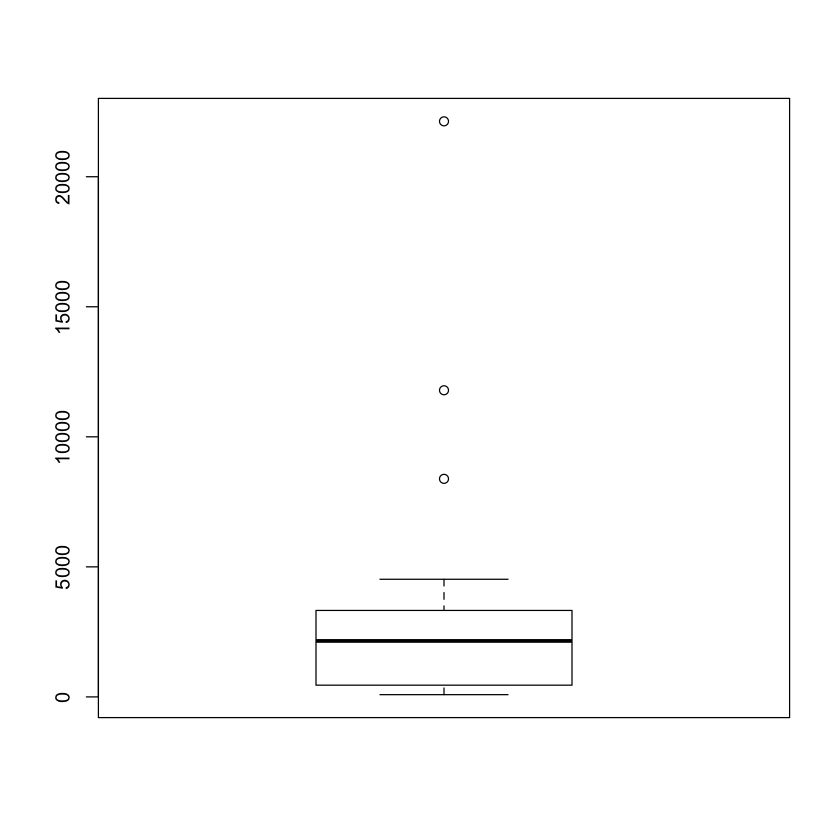

In [40]:
# foreign is already loaded

# Import international.sav as a data frame: demo
demo <- read.spss("international.sav", to.data.frame =TRUE)

# Create boxplot of gdp variable of demo
boxplot(demo$gdp)

mport SPSS data with foreign (2)
In the previous exercise, you used the to.data.frame argument inside read.spss(). There are many other ways in which to customize the way your SPSS data is imported.

In this exercise you will experiment with another argument, use.value.labels. It specifies whether variables with value labels should be converted into R factors with levels that are named accordingly. The argument is TRUE by default which means that so called labelled variables inside SPSS are converted to factors inside R.

You'll again be working with the international.sav data, which is available in your current working directory.

In [41]:
# foreign is already loaded

# Import international.sav as demo_1
demo_1 <- read.spss("international.sav", to.data.frame=TRUE)

# Print out the head of demo_1
head(demo_1)

# Import international.sav as demo_2
demo_2 <- read.spss("international.sav", to.data.frame=TRUE,use.value.labels=FALSE)

# Print out the head of demo_2
head(demo_2)

re-encoding from CP1252


id,country,contint,m_illit,f_illit,lifeexpt,gdp
1,Argentina,Americas,3.0,3.0,16,3375
2,Benin,Africa,45.2,74.5,7,521
3,Burundi,Africa,33.2,48.1,5,86
4,Chile,Americas,4.2,4.4,14,4523
5,Dominican Republic,Americas,12.0,12.7,12,2408
6,El Salvador,Americas,17.6,22.9,11,2302


re-encoding from CP1252


id,country,contint,m_illit,f_illit,lifeexpt,gdp
1,Argentina,2,3.0,3.0,16,3375
2,Benin,1,45.2,74.5,7,521
3,Burundi,1,33.2,48.1,5,86
4,Chile,2,4.2,4.4,14,4523
5,Dominican Republic,2,12.0,12.7,12,2408
6,El Salvador,2,17.6,22.9,11,2302
